In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2   = pd.read_csv("rounds2.csv" , encoding = "ISO-8859-1")
mapping   = pd.read_csv("mapping.csv" , encoding = "ISO-8859-1")

In [3]:
#Converting unique variable to lowercase in both dataframes companies & rounds2
companies['permalink']= companies['permalink'].str.lower()
rounds2['company_permalink']= rounds2['company_permalink'].str.lower()

CHECKPOINT 1

In [4]:
companies.count()

permalink        66368
name             66367
homepage_url     61310
category_list    63220
status           66368
country_code     59410
state_code       57821
region           58338
city             58340
founded_at       51147
dtype: int64

In [5]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [6]:
rounds2.count()

company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
dtype: int64

In [7]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [8]:
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [9]:
rounds2.nunique()

company_permalink           66370
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [10]:
#Merging rounds2 & companies dataframe
master_frame = pd.merge(rounds2, companies, how='left', left_on='company_permalink', right_on='permalink')

In [11]:
master_frame.count()

company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
permalink                  114942
name                       114941
homepage_url               108810
category_list              111535
status                     114942
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94422
dtype: int64

In [12]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

CHECKPOINT 2

In [13]:
#Checking % of missing values (only removing rows if mmissing is more than 30%)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [14]:
# Removing all the rows where 'raised_amount_usd' is null. 
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [15]:
master_frame.count()

company_permalink          94959
funding_round_permalink    94959
funding_round_type         94959
funding_round_code         28169
funded_at                  94959
raised_amount_usd          94959
permalink                  94958
name                       94957
homepage_url               90626
category_list              93914
status                     94958
country_code               89108
state_code                 87355
region                     87911
city                       87914
founded_at                 78992
dtype: int64

In [16]:
# Removing MISSING value rows for the country_code column as analysis will be based on countries also.
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [17]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.77
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.79
category_list               0.65
status                      0.00
country_code                0.00
state_code                  1.97
region                      1.34
city                        1.34
founded_at                 15.33
dtype: float64

In [18]:
# Removing 'funding_round_code' column as it has ~70% missing values
master_frame = master_frame.drop('funding_round_code', axis=1)

In [19]:
#Getting average investment amount for each funding type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt            1.694518e+08
secondary_market         8.152720e+07
private_equity           7.361856e+07
post_ipo_equity          6.601879e+07
debt_financing           1.718640e+07
undisclosed              1.585108e+07
venture                  1.173578e+07
grant                    4.508473e+06
product_crowdfunding     1.489682e+06
convertible_note         1.331938e+06
angel                    9.685599e+05
seed                     7.481045e+05
equity_crowdfunding      5.109480e+05
non_equity_assistance    4.714459e+05
Name: raised_amount_usd, dtype: float64

In [20]:
#Getting number of investments for each funding type
master_frame.groupby('funding_round_type')['raised_amount_usd'].count().sort_values(ascending=False)

funding_round_type
venture                  48111
seed                     21233
debt_financing            6533
angel                     4427
grant                     1979
private_equity            1835
undisclosed               1352
convertible_note          1326
equity_crowdfunding       1136
post_ipo_equity            601
product_crowdfunding       332
post_ipo_debt              151
non_equity_assistance       63
secondary_market            29
Name: raised_amount_usd, dtype: int64

CHECKPOINT 3

In [21]:
#Create Top9 dataframe containing top 9 countries by total investment amount
df = round(master_frame[master_frame['funding_round_type'] == 'venture'].groupby(['country_code'])['raised_amount_usd'].sum(),2).sort_values(ascending=False).to_frame().reset_index()
top9=df[0:9]
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


CHECKPOINT 4

In [22]:
#Clening category list values in mapping file
mapping['category_list'] = mapping['category_list'].str.replace('0','na')

In [23]:
#changing column headers to column values using melt function in mapping file
#removing Blanks sector
mapping = pd.melt(mapping, id_vars=['category_list'], value_vars= ['Automotive & Sports',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], var_name="main_sector")
mapping = mapping[mapping['value']== 1]

In [24]:
#extracting primary sector
master_frame[['primary_sector','sec_sector']]= master_frame['category_list'].str.split('|',1,expand=True)

In [25]:
#merging master_frame with mapping to get a main_sector mapped with primary to create a new dataframe sector_analysis which will be used in further analysis
sector_analysis = pd.merge(master_frame, mapping, how="inner", left_on="primary_sector", right_on="category_list")
sector_analysis.drop(columns=['value','category_list_y'], inplace=True)

CHECKPOINT 5

In [26]:
#Creating 3 dataframes for each of top 3 countries for funding type "venture" & investment amount between $5 Million & $15 Million (inclusive both) 

In [27]:
D1=sector_analysis[(sector_analysis['funding_round_type'] == 'venture') & (sector_analysis['country_code'] == 'USA') & ((sector_analysis['raised_amount_usd']>=5000000) & (sector_analysis['raised_amount_usd']<=15000000))].reset_index()
D1.drop(columns='index',inplace=True)
D1['sum_inv'] =D1.groupby(['main_sector']).raised_amount_usd.transform('sum')
D1['cnt_inv'] =D1.groupby(['main_sector']).main_sector.transform('count')

In [28]:
D2=sector_analysis[(sector_analysis['funding_round_type'] == 'venture') & (sector_analysis['country_code'] == 'GBR') & ((sector_analysis['raised_amount_usd']>=5000000) & (sector_analysis['raised_amount_usd']<=15000000))].reset_index()
D2.drop(columns='index',inplace=True)
D2['sum_inv'] =D2.groupby(['main_sector']).raised_amount_usd.transform('sum')
D2['cnt_inv'] =D2.groupby(['main_sector']).main_sector.transform('count')

In [29]:
D3=sector_analysis[(sector_analysis['funding_round_type'] == 'venture') & (sector_analysis['country_code'] == 'IND') & ((sector_analysis['raised_amount_usd']>=5000000) & (sector_analysis['raised_amount_usd']<=15000000))].reset_index()
D3.drop(columns='index',inplace=True)
D3['sum_inv'] =D3.groupby(['main_sector']).raised_amount_usd.transform('sum')
D3['cnt_inv'] =D3.groupby(['main_sector']).main_sector.transform('count')

Table 5.1

In [30]:
#Sorting all sectors by number of investments in each sector
D1.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values(by='count',ascending=False).reset_index()

,country_code,main_sector,count,sum
0,USA,Others,2950,2.632101e+10
1,USA,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
2,USA,Cleantech / Semiconductors,2300,2.120663e+10
3,USA,"News, Search and Messaging",1582,1.395957e+10
4,USA,Health,909,8.211859e+09
5,USA,Manufacturing,799,7.258553e+09
6,USA,Entertainment,591,5.099198e+09
7,USA,Automotive & Sports,167,1.454104e+09


In [31]:
D1['raised_amount_usd'].sum()

107318294664.0

In [32]:
D1['raised_amount_usd'].count()

12012

In [33]:
D1[D1['main_sector']=='Others'].groupby(['company_permalink','name']).raised_amount_usd.sum().sort_values(ascending = False).head()


company_permalink                  name               
/organization/virtustream          Virtustream            64300000.0
/organization/capella              Capella Photonics      54968051.0
/organization/airtight-networks    AirTight Networks      54201907.0
/organization/decarta              deCarta                52100000.0
/organization/black-duck-software  Black Duck Software    51000000.0
Name: raised_amount_usd, dtype: float64

In [34]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink','name']).raised_amount_usd.sum().sort_values(ascending = False).head()

company_permalink          name                           
/organization/shotspotter  SST Inc. (Formerly ShotSpotter)    67933006.0
/organization/demandbase   Demandbase                         63000000.0
/organization/intacct      Intacct                            61800000.0
/organization/netbase      NetBase Solutions                  60600000.0
/organization/lotame       Lotame                             59700000.0
Name: raised_amount_usd, dtype: float64

In [35]:
#Sorting all sectors by number of investments in each sector
D2.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values(by='count',ascending=False).reset_index()

,country_code,main_sector,count,sum
0,GBR,Others,147,1.283624e+09
1,GBR,"Social, Finance, Analytics, Advertising",133,1.089404e+09
2,GBR,Cleantech / Semiconductors,128,1.150140e+09
3,GBR,"News, Search and Messaging",73,6.157462e+08
4,GBR,Entertainment,56,4.827847e+08
5,GBR,Manufacturing,42,3.619403e+08
6,GBR,Health,24,2.145375e+08
7,GBR,Automotive & Sports,16,1.670516e+08


In [36]:
D2['raised_amount_usd'].count()

619

In [37]:
D2['raised_amount_usd'].sum()

5365228300.0

In [38]:
D2[D2['main_sector']=='Others'].groupby(['company_permalink','name']).raised_amount_usd.sum().sort_values(ascending = False).head()

company_permalink                      name                   
/organization/electric-cloud           Electric Cloud             37000000.0
/organization/sensage                  SenSage                    36250000.0
/organization/enigmatic                Enigmatec                  32500000.0
/organization/silverrail-technologies  SilverRail Technologies    29000000.0
/organization/opencloud                OpenCloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [39]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink','name']).raised_amount_usd.sum().sort_values(ascending = False).head()

company_permalink                    name                 
/organization/celltick-technologies  Celltick Technologies    37500000.0
/organization/mythings               myThings                 34000000.0
/organization/zopa                   Zopa                     32900000.0
/organization/imagini                VisualDNA                28550000.0
/organization/marketinvoice          MarketInvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [40]:
#Sorting all sectors by number of investments in each sector
D3.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum']).sort_values(by='count',ascending=False).reset_index()

,country_code,main_sector,count,sum
0,IND,Others,110,1.013410e+09
1,IND,"Social, Finance, Analytics, Advertising",60,5.505496e+08
2,IND,"News, Search and Messaging",52,4.338345e+08
3,IND,Entertainment,33,2.808300e+08
4,IND,Manufacturing,21,2.009000e+08
5,IND,Cleantech / Semiconductors,20,1.653800e+08
6,IND,Health,19,1.677400e+08
7,IND,Automotive & Sports,13,1.369000e+08


In [41]:
D3['raised_amount_usd'].count()

328

In [42]:
D3['raised_amount_usd'].sum()

2949543602.0

In [43]:
D3[D3['main_sector']=='Others'].groupby(['company_permalink','name']).raised_amount_usd.sum().sort_values(ascending = False).head()

company_permalink               name             
/organization/firstcry-com      FirstCry.com         39000000.0
/organization/myntra            Myntra               38000000.0
/organization/commonfloor       CommonFloor          32900000.0
/organization/pepperfry-com     Pepperfry.com        28000000.0
/organization/itzcash-card-ltd  ItzCash Card Ltd.    25000000.0
Name: raised_amount_usd, dtype: float64

In [44]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['company_permalink','name']).raised_amount_usd.sum().sort_values(ascending = False).head()

company_permalink                         name                      
/organization/manthan-systems             Manthan Systems               50700000.0
/organization/komli-media                 Komli Media                   28000000.0
/organization/shopclues-com               ShopClues.com                 25000000.0
/organization/intarvo                     inTarvo                       21900000.0
/organization/grameen-financial-services  Grameen Financial Services    21556050.0
Name: raised_amount_usd, dtype: float64

CHECKPOINT 6

In [45]:
#Plotting graphs to visualise results of Funding analysis, country analysis & Sector_analysis

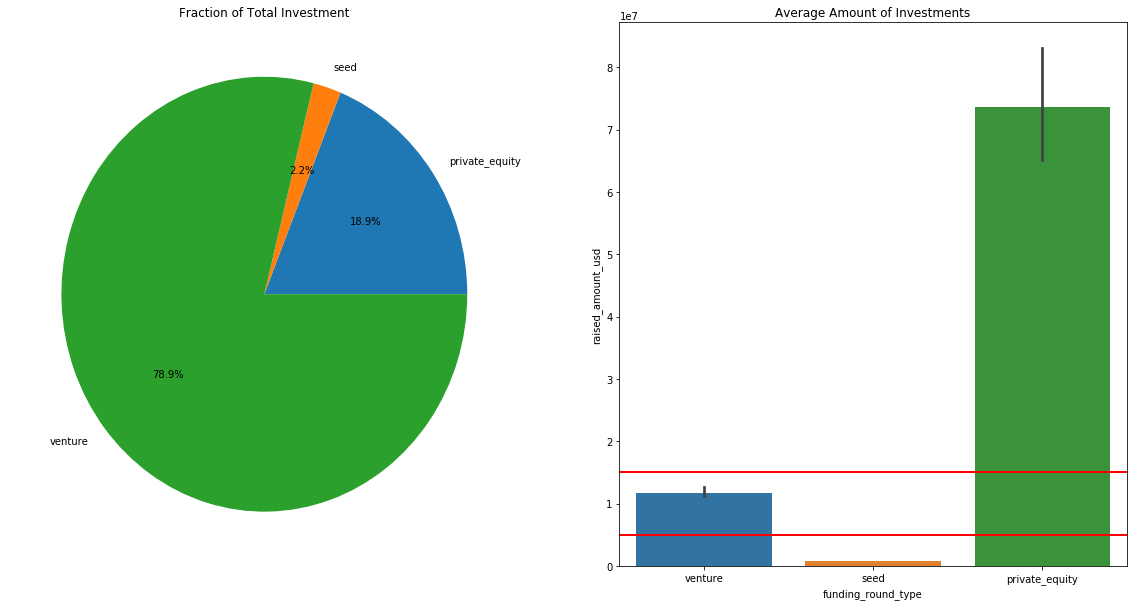

In [46]:
plt.figure(figsize=(20, 10))

# subplot 1: Total Investments
df_chrt=master_frame[master_frame['funding_round_type'].isin(['venture', 'seed', 'private_equity'])].pivot_table(values = 'raised_amount_usd',index = ['funding_round_type'], aggfunc = {'sum'})
plt.subplot(1, 2, 1)
plt.pie(df_chrt, labels=df_chrt.index,autopct='%0.1f%%',radius =1)
plt.title("Fraction of Total Investment")
plt.savefig('tot_ivst.png')

# subplot 1: Average amount of Investments
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame[master_frame['funding_round_type'].isin(['venture', 'seed', 'private_equity'])])
plt.axhline(y=5000000, linewidth=2, color = 'r', label="$5MM")
plt.axhline(y=15000000, linewidth=2, color = 'r', label="$15MM")
plt.title("Average Amount of Investments")
plt.savefig('avg_amt.png')


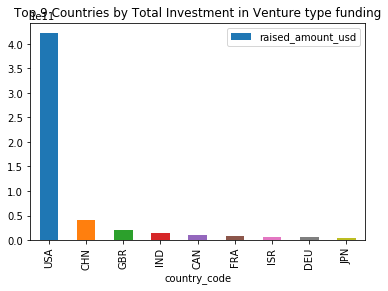

In [47]:
top9.plot.bar(x='country_code', y='raised_amount_usd')
plt.title("Top 9 Countries by Total Investment in Venture type funding")
plt.savefig('top9.png')

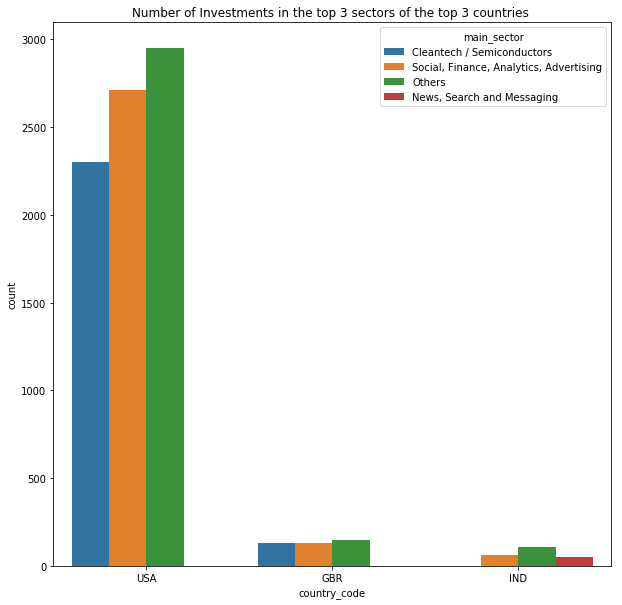

In [48]:
d1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
d2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
d3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]
df = pd.concat([d1,d2,d3])
plt.figure(figsize=(10, 10))
sns.countplot(x='country_code', hue="main_sector", data=df)
plt.title("Number of Investments in the top 3 sectors of the top 3 countries ")
plt.savefig('inv_main_sec_cont.png')


End of Program